In [443]:
#Plotting a 2D Free Energy Plot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

"""Generating Custom Colormap"""
with open ('colormap') as f:                        # imports the custom colormap
    p = f.readlines()
q = [x.split() for x in p]

for i in range(len(q)):
    for j in range(len(q[i])):
        q[i][j] = q[i][j].strip()
        q[i][j] = float(q[i][j])
    q[i] = tuple(q[i])

cmap_name = 'custom'
cm1 = LinearSegmentedColormap.from_list(cmap_name, q)
cm2 = LinearSegmentedColormap.from_list(cmap_name, q[::-1])

##now use cmap=cm1 or cmap=cm2 in plt options

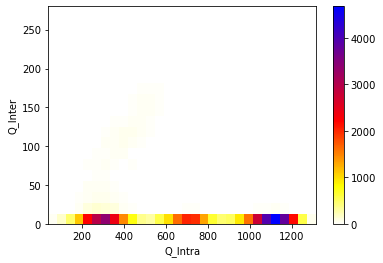

In [444]:
with open("Output.xtc_Double.AA.Q", "r") as qfile:
    Q = qfile.readlines()

intra = []; inter = []; total = []; double = [];
for i in range(len(Q)):
    a = Q[i].split()
    intra.append(int(a[0]))
    inter.append(int(a[1]))
    total.append(int(a[2]))
    double.append(int(a[3]))

h1, h2, h3, h4 = plt.hist2d(intra, inter, (30,20), cmap = cm1)
plt.xlabel("Q_Intra")                #Plotting the intra and inter contacts
plt.ylabel("Q_Inter")
plt.colorbar()
plt.show()


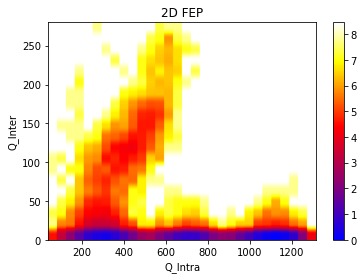

In [447]:
G = []; x = []

for i in range(len(h1)):
    for j in range(len(h1[i])):               #Calculating Free Energy
        #h1[i][j] = -np.log(h1[i][j]+1)
        G.append((-np.log(h1[i]+1))-min_G)

for i in range(len(G)):
    for j in range(len(G[i])):                #Baseline correction
        x.append(G[i][j])
min_G = min(x)
G = G[:][:] - min_G
G = np.array(G)

plt.figure()                                  #Plotting the free energy plot
ax = plt.gca()
im = ax.imshow(G.T, cmap = cm2, extent = [min(h2), max(h2), min(h3), max(h3)], origin = "lower", aspect = "auto")
plt.xlabel("Q_Intra")                         #Plotting the intra and inter contacts
plt.ylabel("Q_Inter")
plt.title("2D FEP")
cbar = plt.colorbar(im)

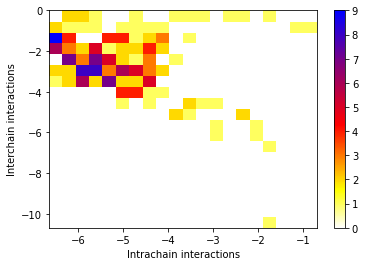

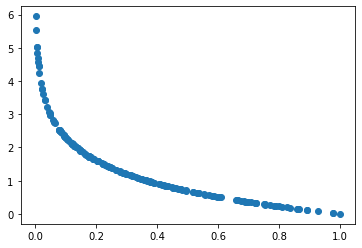

In [435]:
bin = 200

pop_intra = plt.hist(intra, bins = bin)[0]  #Obtaining counts in each bins
pop_inter = plt.hist(inter, bins = bin)[0]

g_intra = -np.log(pop_intra+1)              #Taking the -log of population in each bin
g_inter = -np.log(pop_inter+1)

h = plt.hist2d(g_intra, g_inter, bins = 20, cmap = cm1)
plt.xlabel("Intrachain interactions")
plt.ylabel("Interchain interactions")
plt.colorbar()
plt.show()

g_intra = g_intra - min(g_intra)
pop_intra = pop_intra/max(pop_intra)
plt.scatter(pop_intra,g_intra)
plt.show()